In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
pd.read_csv('Data/listings_detail.csv')

In [424]:
df1 = pd.read_csv('listings_detail.csv')

df1 = df1.drop(columns = ['id',"host_id",'name','listing_url', 'scrape_id', 'last_scraped', 'source','description', 'picture_url','host_url', 'host_name',
                          'host_thumbnail_url', 'host_picture_url','host_neighbourhood','host_listings_count','host_verifications',
                          'neighbourhood','neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude','longitude','bathrooms',
                          'bedrooms','amenities','minimum_minimum_nights','maximum_minimum_nights', 'minimum_maximum_nights',
                          'maximum_maximum_nights', 'minimum_nights_avg_ntm','maximum_nights_avg_ntm',"calendar_updated",'calendar_last_scraped',
                          'number_of_reviews_ltm', 'number_of_reviews_l30d','license','calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                          'calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms','neighborhood_overview', 'host_about'])

## Remove NA values
df1.dropna(subset=df1.columns.difference(['review_scores_rating']), inplace=True)

# Sanity Check
df1.shape


(10150, 34)

In [425]:
## Assign Labels for Popularity as multiple classes

quintiles = [0, 0.25, 0.5, 0.75, 1.0]
quintile_values = df1['number_of_reviews'].quantile(quintiles)
bins = [-1, quintile_values[0.25], quintile_values[0.5], quintile_values[0.75], float('inf')]

labels = ['low popularity', 'moderate popularity', 'high popularity', 'very high popularity']

df1['popularity'] = pd.cut(df1['number_of_reviews'], bins=bins, labels=labels, include_lowest=True)

In [426]:
## Remove $ sign from price 
df1['price'] = df1['price'].str.replace('$', '')
df1['price'] = df1['price'].str.replace(',', '').astype('float')

## Transfer % to float
df1['host_response_rate'] = df1['host_response_rate'].str.replace('%','').astype('float') / 100
df1['host_acceptance_rate'] = df1['host_acceptance_rate'].str.replace('%','').astype('float') / 100

## Extract number of bathrooms
df1['bathrooms_text'] = df1['bathrooms_text'].str.extract('(\d+)').astype('float')

# host_is_local
def is_local(location):
  return 1 if location == 'Bangkok, Thailand' else 0

df1['host_is_local'] = df1['host_location'].apply(is_local)


# Remove columns
df1.drop(columns = (['host_location', 'property_type', 'number_of_reviews']), inplace=True)


In [427]:
def encode_columns(df, columns):
    encoder = LabelEncoder()
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    return df

# List of columns you want to encode
columns_to_encode = [
    'popularity',
    'host_is_superhost',
    'host_has_profile_pic',
    'host_identity_verified',
    'has_availability',
    'instant_bookable',
    'host_response_time',
    'room_type'
]

df1 = encode_columns(df1, columns_to_encode)

In [428]:
# Calculate the difference in years
import datetime as dt
df1['host_since'] = pd.to_datetime(df1['host_since'])
current_date = dt.datetime.now().date()
df1['host_years'] = df1['host_since'].apply(lambda x: current_date.year - x.year - ((current_date.month, current_date.day) < (x.month, x.day)))
df1.drop(columns=['host_since'],inplace=True)

# calculate reviews years range
df1['first_review'] = pd.to_datetime(df1['first_review'])
df1['last_review'] = pd.to_datetime(df1['last_review'])
df1['review_years_range']= round(((df1['last_review'] - df1['first_review']) / pd.Timedelta(days=365.25)).astype(float),2)
df1.drop(columns=['first_review','last_review'],inplace=True)

df1.head()

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,room_type,accommodates,bathrooms_text,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,popularity,host_is_local,host_years,review_years_range
0,3,1.0,0.86,0,2,1,1,0,3,1.0,...,4.97,4.91,4.66,4.75,0,0.45,3,1,13,7.75
5,3,1.0,1.00,0,2,1,1,2,2,1.0,...,4.25,4.75,4.75,5.00,0,0.04,2,1,13,6.72
8,3,1.0,0.90,1,10,1,1,2,2,1.0,...,4.80,4.87,4.73,4.83,0,0.20,0,1,13,12.71
10,3,1.0,1.00,0,52,1,1,0,2,1.0,...,4.69,4.73,4.42,4.51,0,1.73,3,0,11,10.29
11,3,1.0,0.90,1,10,1,1,1,2,1.0,...,4.87,4.85,4.74,4.68,0,1.33,3,1,13,8.81


In [429]:
df1.isna().sum()

host_response_time              0
host_response_rate              0
host_acceptance_rate            0
host_is_superhost               0
host_total_listings_count       0
host_has_profile_pic            0
host_identity_verified          0
room_type                       0
accommodates                    0
bathrooms_text                 24
beds                            0
price                           0
minimum_nights                  0
maximum_nights                  0
has_availability                0
availability_30                 0
availability_60                 0
availability_90                 0
availability_365                0
review_scores_rating            0
review_scores_accuracy          0
review_scores_cleanliness       0
review_scores_checkin           0
review_scores_communication     0
review_scores_location          0
review_scores_value             0
instant_bookable                0
reviews_per_month               0
popularity                      0
host_is_local 

In [430]:
df1[df1['bathrooms_text'] == np.nan]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_has_profile_pic,host_identity_verified,room_type,accommodates,bathrooms_text,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month,popularity,host_is_local,host_years,review_years_range


In [431]:
df1.to_csv('cleaned.csv', index=False)

In [432]:
correlation_matrix = df1.corr()

# Isolate the 'popularity' correlations and drop the self-correlation
popularity_correlation = correlation_matrix['popularity'].drop('popularity', axis=0)

# Sort the correlations in descending order
sorted_correlation = popularity_correlation.sort_values(ascending=False)

# Display the sorted correlations
print(sorted_correlation)

review_years_range             0.336413
reviews_per_month              0.209974
host_years                     0.139287
accommodates                   0.071792
host_is_superhost              0.062199
host_acceptance_rate           0.061227
review_scores_accuracy         0.057787
review_scores_checkin          0.055133
host_response_time             0.054069
review_scores_value            0.051966
review_scores_communication    0.048802
review_scores_rating           0.045368
review_scores_cleanliness      0.043604
beds                           0.040293
host_response_rate             0.039772
maximum_nights                 0.033537
review_scores_location         0.025645
bathrooms_text                 0.024523
price                          0.016757
host_has_profile_pic           0.010487
instant_bookable               0.007602
host_identity_verified         0.003595
has_availability              -0.004715
host_is_local                 -0.018436
host_total_listings_count     -0.022588


In [433]:
len(df1.columns)

32

In [434]:
y = df1.copy()


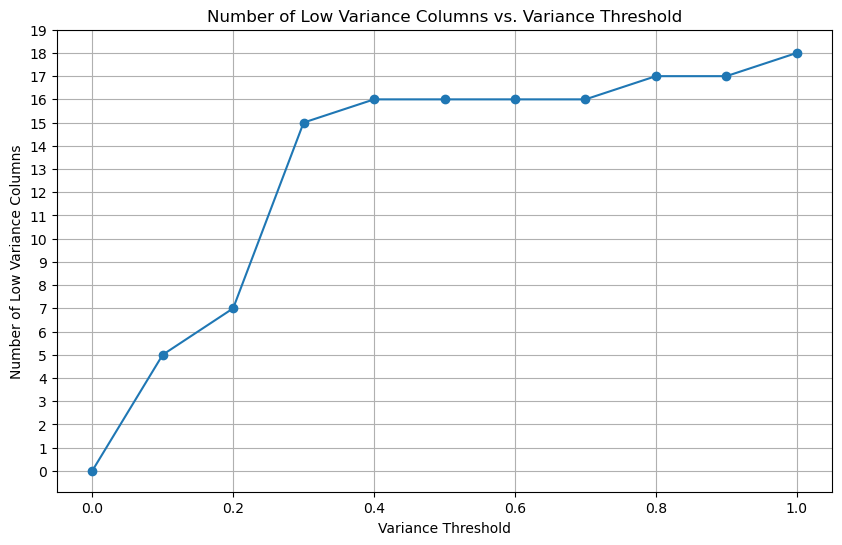

In [435]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

# Assuming 'y' is your DataFrame and contains the 'popularity' column
df_feature = y.drop(columns=['popularity'])

# Generate a range of threshold values
threshold_values = np.linspace(0, 1, 11)  # For example, trying thresholds from 0 to 1 in 0.1 increments

# Prepare lists to store the results
thresholds = []
num_low_variance_cols = []

for i in threshold_values:
    var_thres = VarianceThreshold(threshold=i)  # Set the current threshold value
    var_thres.fit(df_feature)

    # Identify columns that do not meet the current variance threshold
    constant_columns = [column for column in df_feature.columns
                        if column not in df_feature.columns[var_thres.get_support()]]

    # Append the results to the lists
    thresholds.append(i)
    num_low_variance_cols.append(len(constant_columns))

# Now plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, num_low_variance_cols, marker='o', linestyle='-')
plt.title('Number of Low Variance Columns vs. Variance Threshold')
plt.xlabel('Variance Threshold')
plt.ylabel('Number of Low Variance Columns')
plt.yticks(range(0, 20))
plt.grid(True)
plt.show()


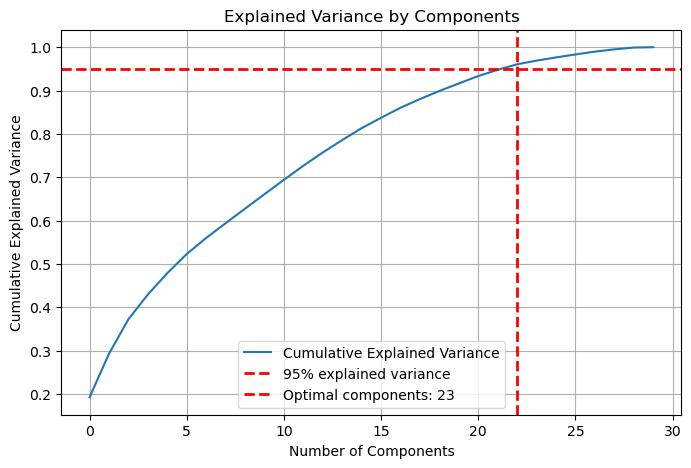

In [436]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming df1 is your DataFrame and 'popularity' is the target column

# Step 1: Prepare the data
data = df1.copy()
data.drop(columns=['bathrooms_text'], inplace=True)

# Separate features and target
X = data.drop('popularity', axis=1)
y = data['popularity']

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Apply PCA to determine the optimal number of components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Find the number of components for 95% variance
optimal_components = np.where(cumulative_explained_variance >= 0.95)[0][0] + 1

# Step 4: Plot the explained variance to visualize the trade-off
plt.figure(figsize=(8, 5))
plt.plot(cumulative_explained_variance, label='Cumulative Explained Variance')
plt.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% explained variance')
plt.axvline(x=optimal_components - 1, color='red', linestyle='--', linewidth=2, label=f'Optimal components: {optimal_components}')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Components')
plt.legend()
plt.grid(True)
plt.show()

# Step 5: Apply PCA with the optimal number of components
pca_optimal = PCA(n_components=optimal_components)
X_pca_optimal = pca_optimal.fit_transform(X_scaled)

# X_pca_optimal now contains the reduced feature set based on the optimal PCA components


In [437]:
import pandas as pd

# Get the loadings of the PCA components
loadings = pca_optimal.components_

# Create a DataFrame with the loadings
loadings_df = pd.DataFrame(loadings.T, columns=[f'PC{i+1}' for i in range(loadings.shape[0])], index=X.columns)

# Calculate the absolute sum of loadings for each feature to see their overall contribution
feature_importance = np.abs(loadings_df).sum(axis=1).sort_values(ascending=False)

# Display the feature importance
print(feature_importance[0:21])


host_is_superhost            3.834173
host_years                   3.628069
room_type                    3.595238
instant_bookable             3.555786
minimum_nights               3.467184
reviews_per_month            3.430060
host_total_listings_count    3.412294
maximum_nights               3.411968
review_years_range           3.388139
host_is_local                3.161332
host_acceptance_rate         3.099845
availability_365             3.052913
host_identity_verified       2.998754
price                        2.972883
beds                         2.870935
accommodates                 2.535888
host_has_profile_pic         2.521511
host_response_rate           2.404367
review_scores_location       2.377412
host_response_time           2.230503
has_availability             2.046037
dtype: float64


In [438]:
len(feature_importance)

30

In [439]:
print(X_pca_optimal.components)

AttributeError: 'numpy.ndarray' object has no attribute 'components'